In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [3]:
df = pd.read_csv('ds1_train.csv')
df.head()

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


In [42]:
print(df.shape)
df.columns

(800, 3)


NameError: name 'y' is not defined

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     800 non-null    float64
 1   x_2     800 non-null    float64
 2   y       800 non-null    float64
dtypes: float64(3)
memory usage: 18.9 KB


In [19]:
df.nunique()

x_1    800
x_2    800
y        2
dtype: int64

In [9]:
print(df['y'].unique())

[0. 1.]


In [20]:
df.describe()

,x_1,x_2,y
count,800.000000,800.000000,800.000000
mean,3.515825,92.748239,0.500000
std,1.117077,113.841915,0.500313
min,-0.517464,1.403270,0.000000
25%,2.792988,26.244045,0.000000
50%,3.462076,55.325152,0.500000
75%,4.297189,114.647613,1.000000
max,7.017044,922.403554,1.000000


In [21]:
df.isnull().sum()

x_1    0
x_2    0
y      0
dtype: int64

In [43]:
X = df.drop(['y'], axis=1)
y = df['y']
X.head()
y.shape

(800,)

<Axes: >

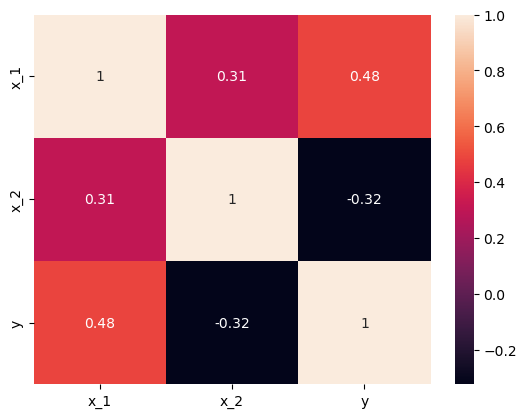

In [14]:
sns.heatmap(df.corr(), annot=True)

C:\Users\jbsch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jbsch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


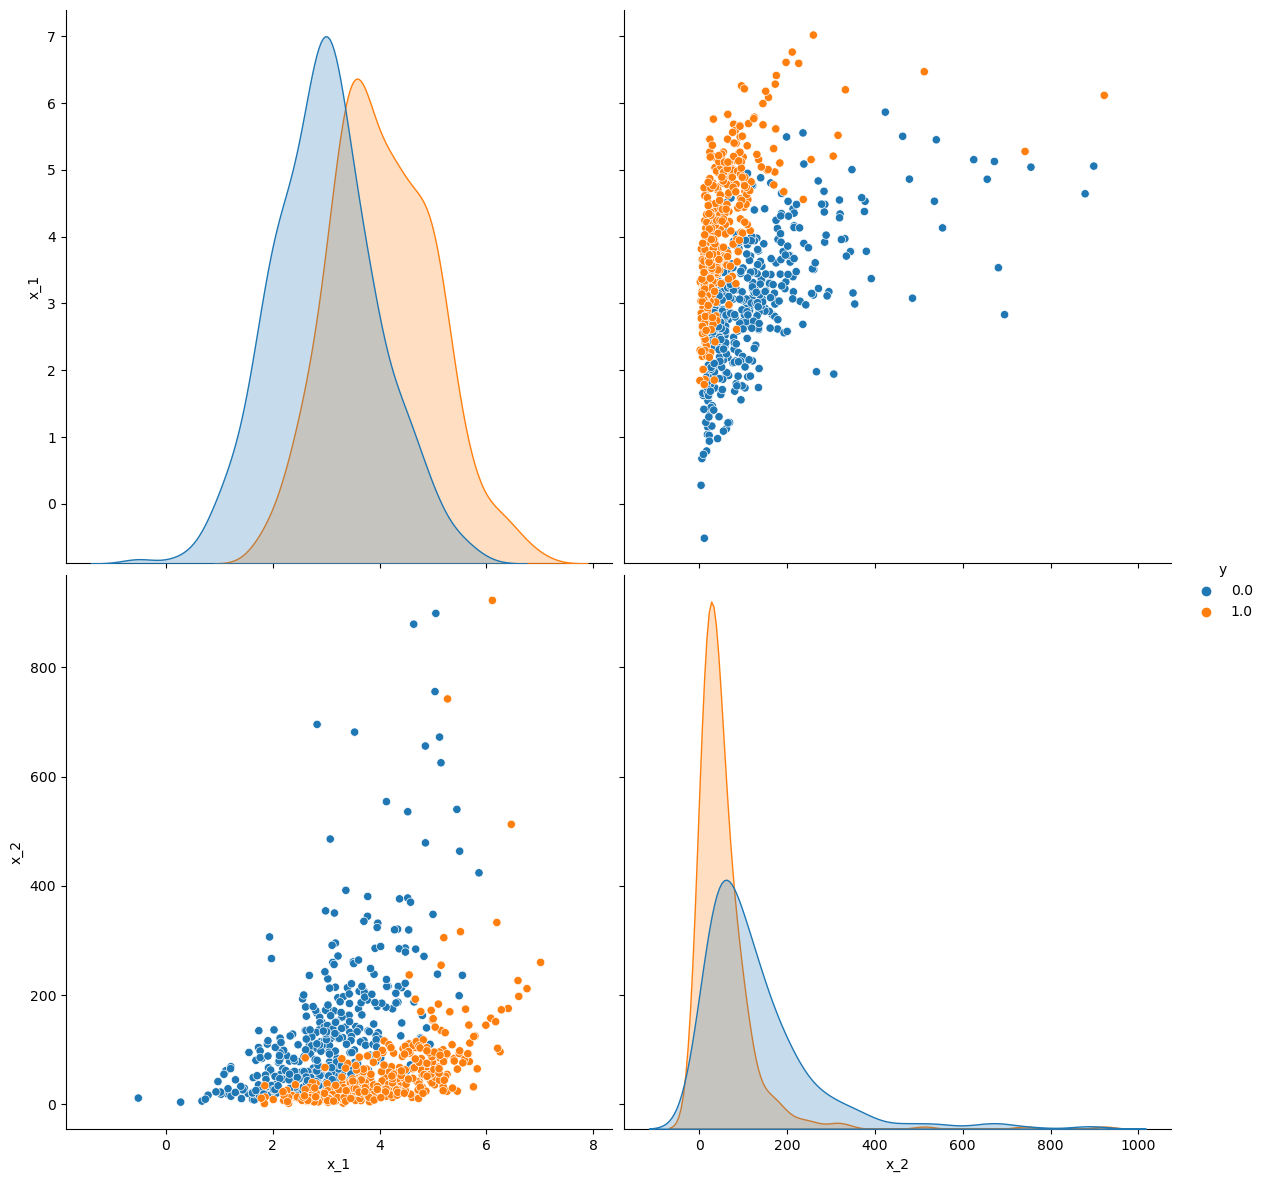

In [35]:
sns.pairplot(data=df, hue='y', size=6)

<Axes: xlabel='y', ylabel='x_1'>

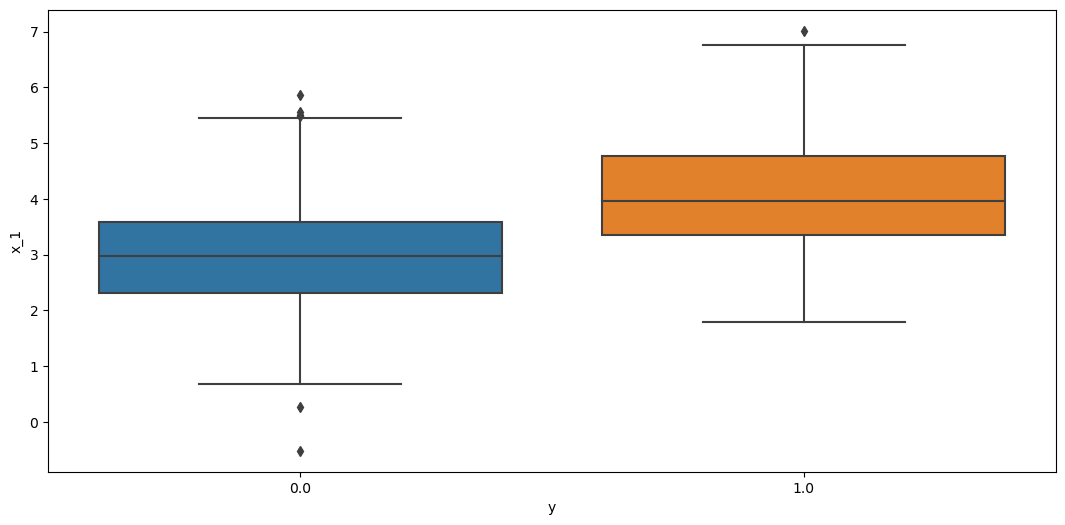

In [28]:
plt.figure(figsize=(13, 6))
sns.boxplot(x= 'y',y='x_1', data=df.sort_values('x_1',ascending=False))

<Axes: xlabel='y', ylabel='x_2'>

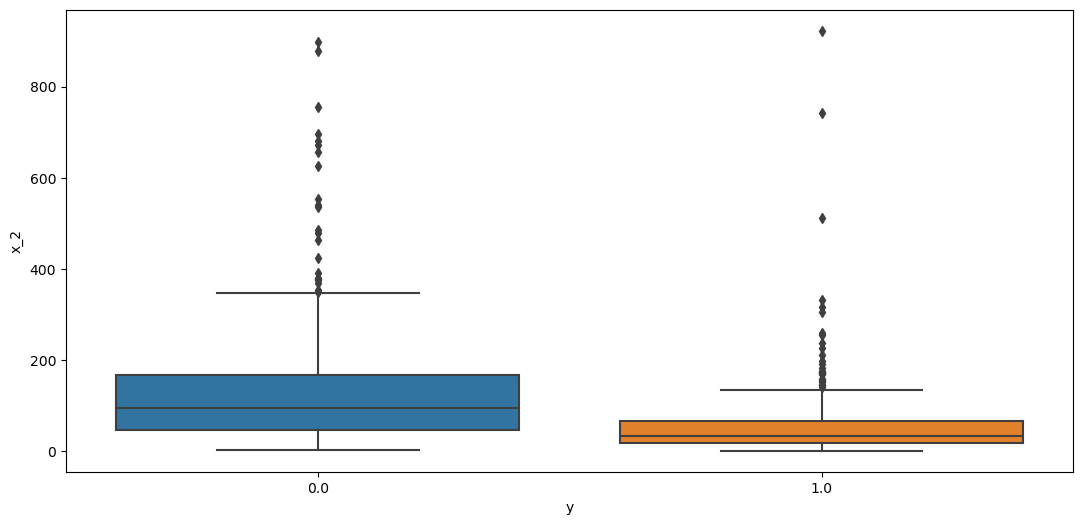

In [29]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='y', y='x_2', data=df.sort_values('x_2',ascending=False))

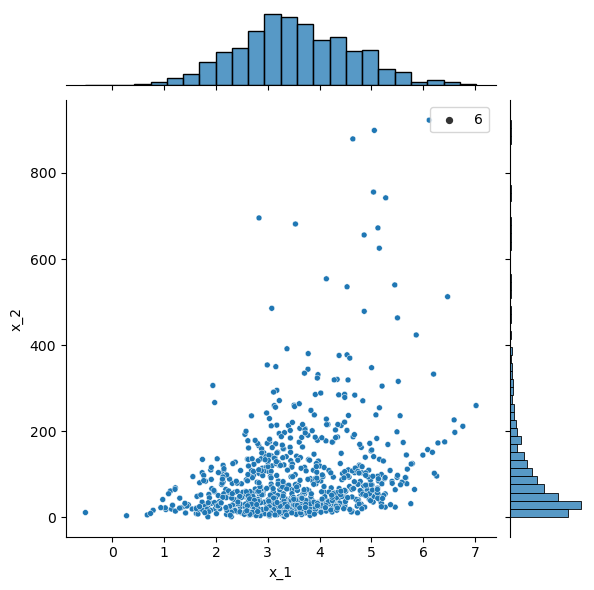

In [34]:
sns.jointplot(data=df, x='x_1', y='x_2', size=6)

<Axes: xlabel='y', ylabel='x_2'>

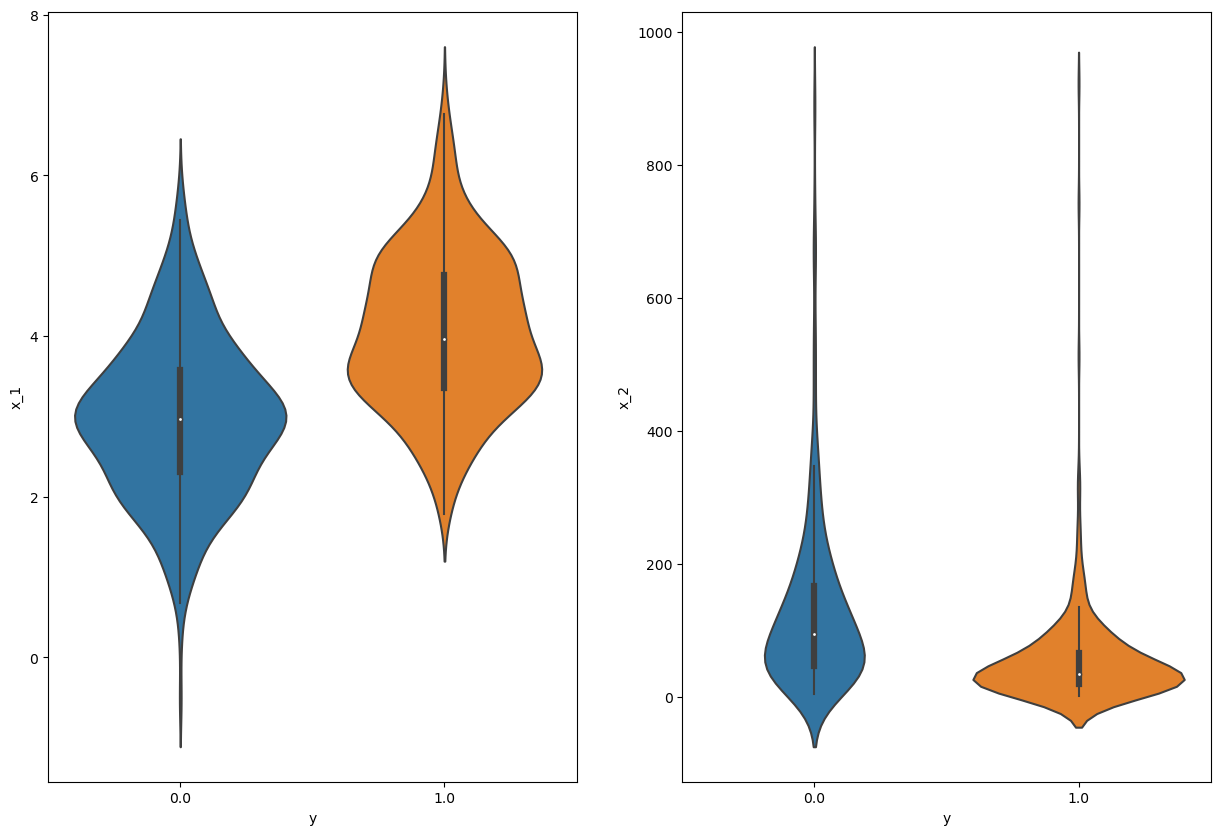

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.violinplot(x='y',y='x_1',data=df)
plt.subplot(1,2,2)
sns.violinplot(x='y',y='x_2',data=df)

In [94]:
w_list = []
b_list = []

def LogisticRegression(X, y, learning_rate, num_iter):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    def sigmoid(z):
        # sigmoid activation function
        res = 1/(1+np.exp(-z))
        return res
    
    def calc_h(X, w, b):
        z = np.dot(X, w)+b
        h = sigmoid(z)
        return h
    
    for i in range(num_iter):
        y_pred = predict(X, w, b)
        w_list, b_list = update_weights(X, y, w, b, learning_rate)
    
    w_final = w_list[num_iter-1]
    b_final = b_list[num_iter-1]
    
    return w_final, b_final
    
def predict(X, w, b):
    h = 1/(1+np.exp(-(np.dot(X, w)+b)))
    y_pred = np.where( h > 0.5, 1, 0 )         
    return y_pred

def update_weights(X, y, w, b, learning_rate):
    m, n = X.shape
    h = 1/(1+np.exp(-(np.dot(X, w)+b)))
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h))
    # gradients
    tmp = (loss - y.T)         
    tmp = np.reshape(tmp, m)         
    dw = np.dot(X.T, tmp)/m          
    db = np.sum(tmp)/m
    # update weights     
    w = w - learning_rate * dw     
    b = b - learning_rate * db
    w_list.append(w)
    b_list.append(b)
    return w_list, b_list

def model_evaluation(y1, y2):
    print('Confusion Matrix')
    print(confusion_matrix(y1, y2))
    print('Classification Report')
    print(classification_report(y1, y2))

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
w, b = LogisticRegression(X_train, y_train, learning_rate=0.001, num_iter=10000)
print(w)
print(b)

[-0.0003963  -0.03417908]
-0.00019314718055994532


In [100]:
y_pred = predict(X_test, w, b)
model_evaluation(y_pred, y_test)

Confusion Matrix
[[80 80]
 [ 0  0]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67       160
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50       160
   macro avg       0.50      0.25      0.33       160
weighted avg       1.00      0.50      0.67       160



C:\Users\jbsch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jbsch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jbsch\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
